<a href="https://colab.research.google.com/github/whgodyd/whgodyd.github.io/blob/main/0207%EC%8B%A4%EC%8A%B5_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 데이터 분석 및 시각화

---

> 타이타닉은 1912년 4월 10일 영국의 사우샘프턴에서 출항해 프랑스의 셸부르와 아일랜드의 퀸즈타운에 기항한 후 미국 뉴욕을 향해 출항하였고, 첫 항해 중 4월 15일 빙산과의 충돌로 침몰하였으며, 사망자는 1,514명으로 알려져 있음


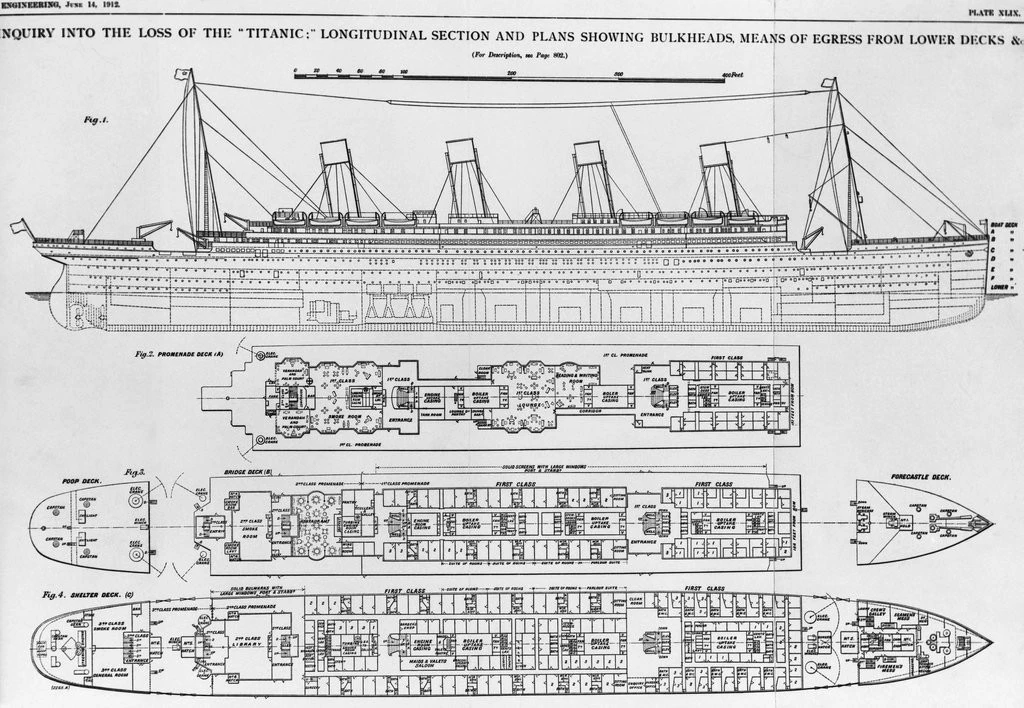

## Titanic 데이터 설명

  - survived: 생존 여부 (0=No, 1=Yes), Category
  - pclass: 선실 등급 (1=First, 2=Second, 3=Third), Category
  - sex: 성별 (0=Female, 1=Male), Category
  - age: 나이, Numeric
  - sibsp: 함께 탑승한 형제 또는 배우자 수, Numeric
  - parch: 함께 탑승한 부모 또는 자녀 수, Numeric
  - fare: 요금, Numeric
  - embarked: 탑승 장소 (S=Southhampton, C=Cherbourg, Q=Queenstown)
  - class: 선실 등급 (First, Second, Third)
  - who: 아동, 여성, 남성 구분 (Child, Woman, Man), Category
  - adult_male: 성인 남성 여부 (True, False), Category
  - deck: 배의 갑판 (A ~ G), Category
  - embark_town: 탑승 장소 (Southhampton, Cherbourg, Queenstown)
  - alive: 생존 여부 (0=No, 1=Yes), Category
  - alone: 1인 탑승 여부 (True, False), Category

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import missingno as msno

## 데이터 전처리

In [18]:
titanic=sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.shape

(891, 15)

### 누락값, 결측치 처리

In [7]:
titanic.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [8]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

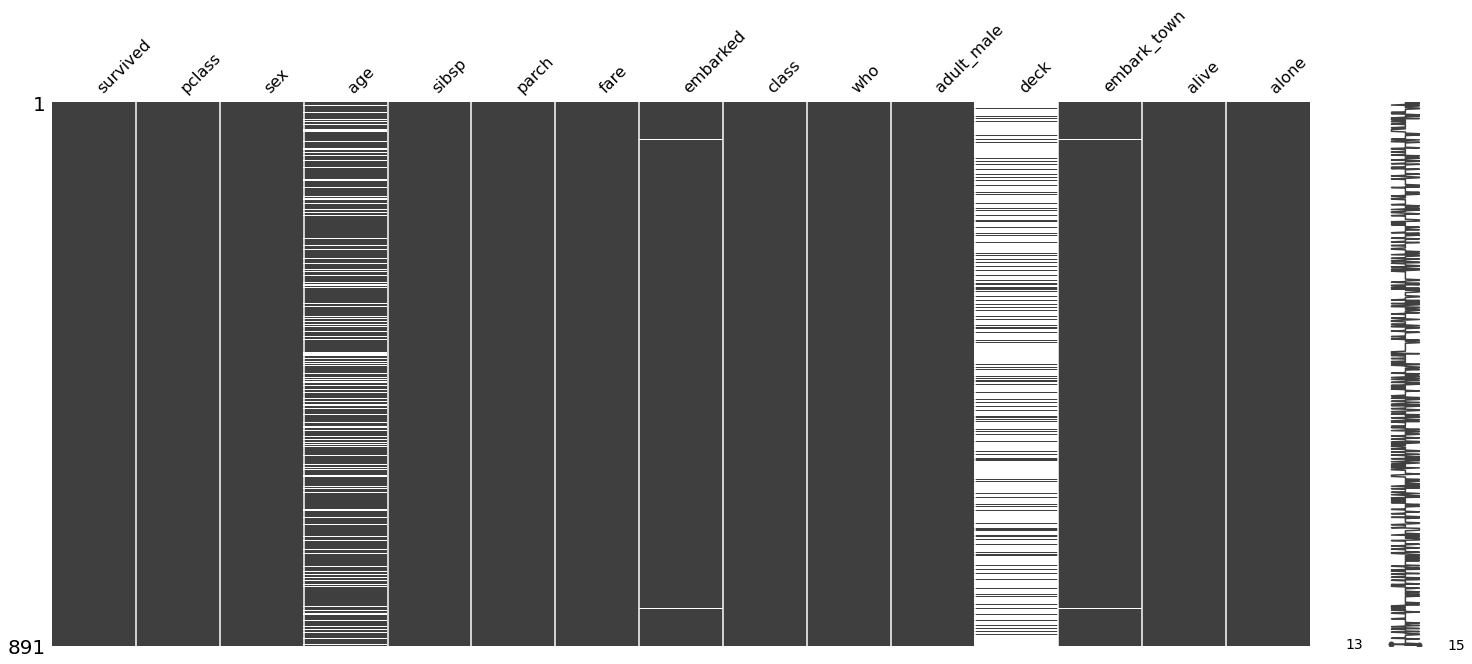

In [11]:
msno.matrix(titanic)

In [12]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [13]:
titanic.embarked.fillna("S",inplace=True)

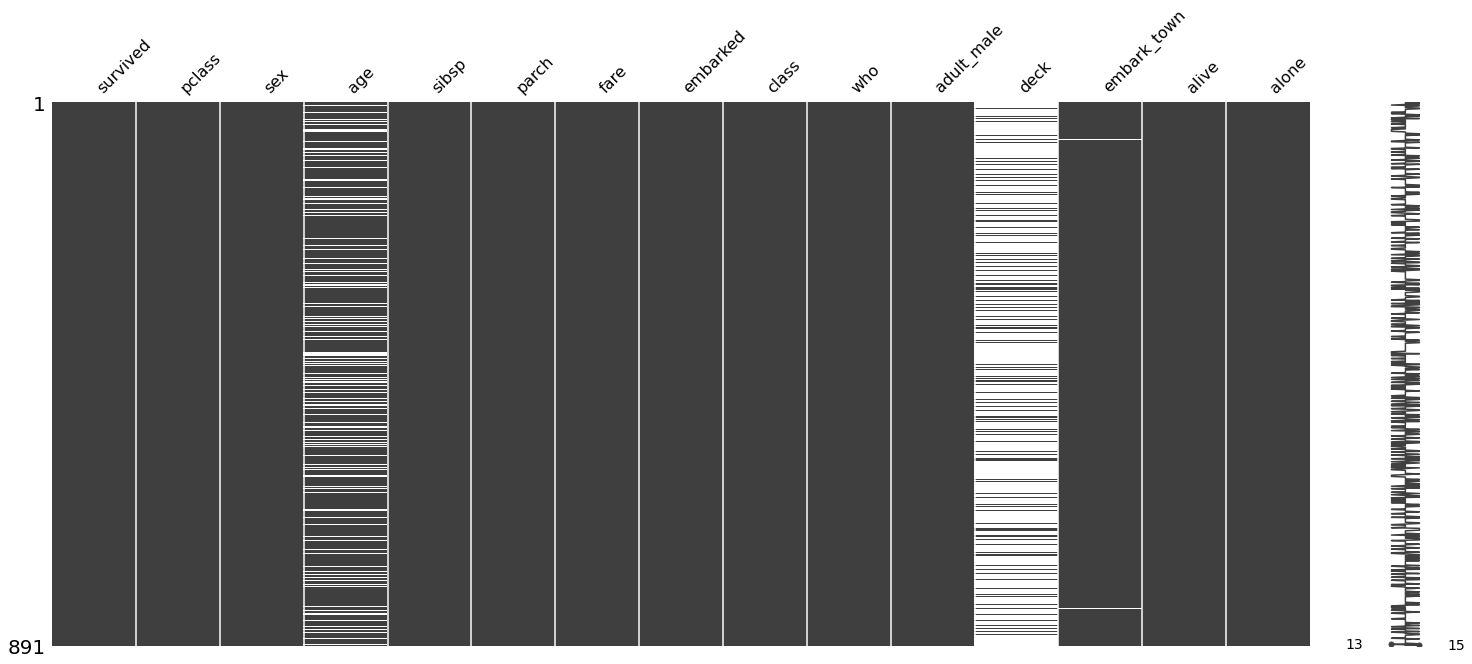

In [14]:
msno.matrix(titanic)

### 컬럼 추가

In [16]:
titanic["family"]=1+titanic["sibsp"]+titanic["parch"]
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


## 데이터 분석 및 시각화

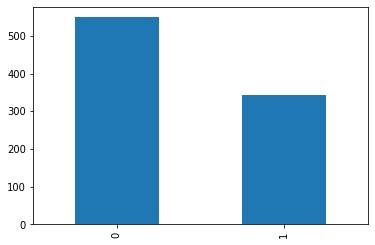

In [25]:
titanic.survived.value_counts().plot.bar()

In [31]:
titanic.class.value_counts()

SyntaxError: ignored

### 집계 및 통계

#### 생존자

#### 등급

#### 성별

#### 나이

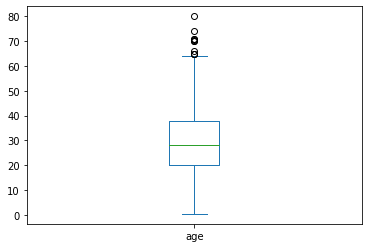

In [32]:
titanic.age.plot.box()

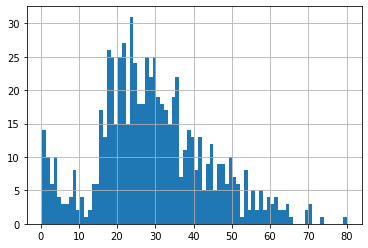

In [33]:
titanic.age.hist(bins=80)

#### 운임료

#### 승선 위치

#### 갑판

#### 가족

### groupby() 함수

* 같은 값을 하나로 묶어 통계 또는 집계 결과를 얻기 위해 사용
* 그룹화 시킬 DataFrame은 숫자여야 함
* 전체 groupby를 할 경우, 숫자로 된 DataFrame 내 데이터만 분석
* Aggregation: 집계 함수를 지정하여 원하는 값을 도출

In [34]:
titanic.groupby("class").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


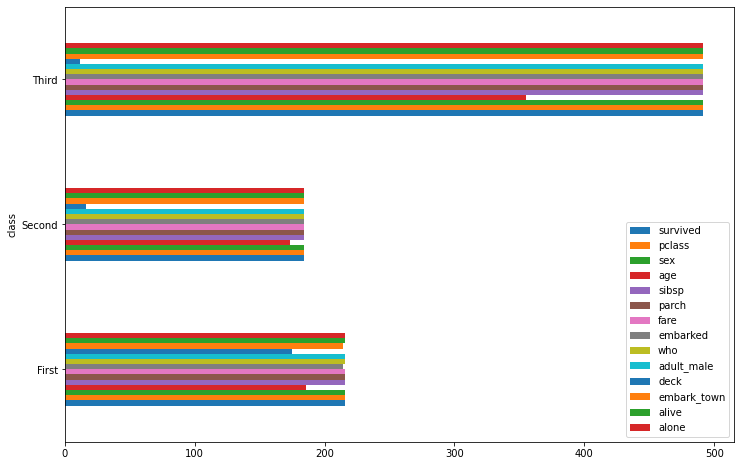

In [35]:
titanic.groupby("class").count().plot.barh(figsize=(12,8))

#### 등급별 생존자 비율

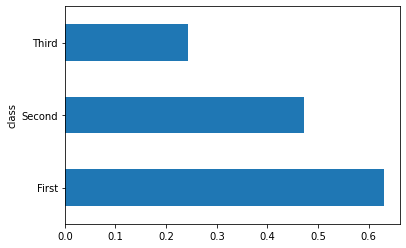

In [39]:
titanic.groupby("class")["survived"].mean().plot.barh()

#### 등급별 탑승객 나이 평균

#### 등급별 운임료 평균

#### 성별 생존자 비율

In [40]:
titanic.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

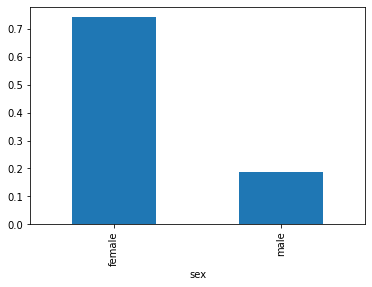

In [41]:
titanic.groupby("sex")["survived"].mean().plot.bar()

#### 성별 탑승객 나이 평균

In [43]:
titanic.groupby("sex")["age"].mean()

sex
female    27.915709
male      30.726645
Name: age, dtype: float64

#### 성별 운임료 평균

In [44]:
titanic.groupby("sex")["fare"].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

#### 승선 위치별 생존자 비율

In [45]:
titanic.groupby("embark_town")["survived"].mean()

embark_town
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.336957
Name: survived, dtype: float64

#### 승선 위치별 운임료 평균

#### 아동, 여성, 남성별 생존자 비율

In [46]:
titanic.groupby("who")["survived"].mean()

who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

#### 아동, 여성, 남성별 운임료 평균

#### 갑판별 생존자 비율

#### 갑판별 탑승객 나이 평균

#### 갑판별 운임료 평균

#### 1인 탑승자 생존자 비율

#### 가족 탑승자 생존자 비율

#### 등급별, 성별 생존자 비율

#### 등급별, 성별 운임료 평균

#### 갑판별, 성별 생존자 비율

#### 갑판별, 등급별 생존자 비율

In [48]:
titanic.groupby(["deck","class"])["survived"].mean().unstack()

class,First,Second,Third
deck,,,
A,0.466667,NaN,NaN
B,0.744681,NaN,NaN
C,0.593220,NaN,NaN
D,0.758621,0.750,NaN
E,0.720000,0.750,1.0
F,NaN,0.875,0.2
G,NaN,NaN,0.5


#### 등급별, 아동, 여성, 남성별 생존자 비율

### query() 함수

* 비교 연산자( ==, >, >=, <, <=, != )
* 논리 연산자(and, or, not)
* IN 연산자(in, ==, not in, != )
* 외부 변수(또는 함수) 참조 연산
* 인덱스 검색
* 문자열 부분검색( str.contains, str.startswith, str.endswith )

In [51]:
titanic.query("alive=='yes'")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


#### 등급별 생존자 수

In [52]:
titanic.query("alive=='yes'").groupby("class").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


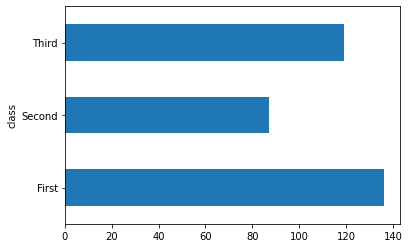

In [53]:
titanic.query("alive=='yes'").groupby("class")["survived"].count().plot.barh()

In [56]:
titanic.query("alive=='yes'").groupby(["class","sex"])["survived"].count().unstack()

sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


#### 등급별, 성별 생존자 수

#### 등급별 여자 생존자 수

#### 등급별, 아동, 여성, 남성별 생존자 수

#### 등급별, 아동 생존자 수

### pivot_table() 함수

* 두 개 이상의 열을 이용하여 행/열 인덱스로 reshape 된 테이블
* 새로운 테이블에서 새로운 기준으로 집계 가능

#### 등급별, 아동, 여성, 남성별 생존자 비율

#### 등급별, 나이대별 생존자 비율

#### 성별, 나이대별 생존자 비율

#### 등급별, 아동, 여성, 남성별 생존자 비율

#### 등급별, 갑판별 생존자 비율

### crosstab() 함수

#### 등급별 생존자 수

#### 성별 생존자 수

#### 갑판별 생존자 수

#### 등급별, 성별 생존자 수

#### 등급별, 갑판별 생존자 수